In [1]:
#Problemdefinition

#Input: Egenskaper f√∂r l√•tar, s√•som genre, tempo, energi, ljudegenskaper m.m.

#Output: Bin√§r klassificering ‚Äî popul√§r eller inte popul√§r.

#Syfte: Att bygga en maskininl√§rningsmodell som kan f√∂ruts√§ga l√•tars popularitet med h√∂g precision och balanserad klassprestanda.

#Motivering f√∂r valet av problem
#Att f√∂ruts√§ga l√•tars popularitet √§r ett relevant problem i dagens musikindustri, 
#d√§r algoritmer i stor utstr√§ckning styr vad som n√•r lyssnare. Ett prediktivt verktyg kan bidra till f√∂rb√§ttrade rekommendationssystem,
#musikanalys och strategisk marknadsf√∂ring. Datasetet inneh√•ller m√•ngsidiga och kvantitativa egenskaper om l√•tar, 
#vilket g√∂r det v√§l l√§mpat f√∂r maskininl√§rning och klassificeringsuppgifter. 
#Genom att analysera denna data kan vi dra insiktsfulla slutsatser om vilka faktorer som p√•verkar popul√§ritet och samtidigt 
#demonstrera v√§rdet av datadrivna beslut i musikbranschen.

# Core
#1.Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay
)

# Imbalance handling
from imblearn.over_sampling import RandomOverSampler

RANDOM_STATE = 42
pd.set_option("display.max_columns", None)

#Explanation:
#pandas and numpy ‚Üí to process and transform the dataset.
#matplotlib ‚Üí to visualize distributions and results.
#train_test_split ‚Üí divides the dataset into training (to build the model)
#and test (to evaluate it).
#LogisticRegression ‚Üí a simple baseline classification model.
#accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay
# to measure how well the model works.‚Ä¢
#RandomOverSampler ‚Üí ensures both classes (popular / not popular)
#have the same size by duplicating minority samples.

#Varf√∂r beh√∂ver vi detta? T√§nk dig en verktygsl√•da f√∂r att hela modellen s√• vi kan visualisera och tr√§na och utv√§rdera v√•ran modell.


In [2]:
#2.Load the Dataset
#We load the CSV file containing Spotify data and check the first rows to ensure everything looks correct.
# Load your local CSV (keep the exact filename you have)
CSV_PATH = "Popular_Spotify_Songs (1).csv"
df = pd.read_csv(CSV_PATH, encoding="latin1")

# Quick sanity check
print(df.shape)
df.head()



#Explanation:

#	pd.read_csv(...) ‚Üí loads the dataset into a DataFrame (df).
#	encoding='latin1' ‚Üí avoids issues with special characters (e.g., Swedish or accented letters).
#	df.head() ‚Üí prints the first five rows so we can verify the structure of the data.


#Detta g√∂r vi f√∂r att s√§kerhetsst√§lla att allt laddats in r√§tt, och f√• in en √∂verblick √∂ver datasetets strukur.

(953, 24)


track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  in_apple_charts  \
0                147  141381703                  43              263   
1                 48  133716286                  48              126   
2                113  140003974                  94              207   
3                100  800840817                 116              207   
4                 50  303236322                  84              133   

  in_deezer_playlists  in_deezer_charts in_shazam_charts  bpm key   mode  \
0                  45                10              826  125   B  Major   
1                  58                14              382   92  C#  Major   
2                  91                14              949  138   F  Major   
3                 125                12              548  170   A  Major   
4                  87                15              425  144   A  Minor   

   danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
0              80         89        83              31                   0   
1              71         61        74               7                   0   
2              51         32        53              17                   0   
3              55         58        72              11                   0   
4              65         23        80              14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6

In [3]:

#3. Create Target Column (Popularity Label)

#Here we classify songs into popular or not popular based on how many playlists they appear in. 
#We start with the threshold = 5000.

# Define a function to classify songs based on playlist count
def classify_popularity(playlist_count):                    # input = number of playlists
    if playlist_count >= 5000:                              # threshold = 5000 playlists
        return "popul√§r"                                    # considered popular
    else:
        return "inte popul√§r"                               # considered not popular

# Apply the function to create a new column
df["popularity_category"] = df["in_spotify_playlists"].apply(classify_popularity)

# Show counts of each category
print("Counts at threshold=5000:")
print(df["popularity_category"].value_counts())

#Explanation:

#	classify_popularity: function that checks if a song has ‚â•5000 playlists.
#	If yes ‚Üí ‚Äúpopul√§r‚Äù, otherwise ‚Äúinte popul√§r‚Äù.
#	We then create a new column, popularity_category, in the dataset.
#	Finally, we print the distribution of the two classes.

#Varf√∂r? Detta g√∂rs f√∂r att definera v√•rat m√•l (target), vi omvandlar ett numeriskt v√§rde (in_spotify_playlist) 
#till en bin√§r katogeri som √§r l√§mlplig att tr√§na denna modell.



Counts at threshold=5000:
popularity_category
inte popul√§r    692
popul√§r         261
Name: count, dtype: int64


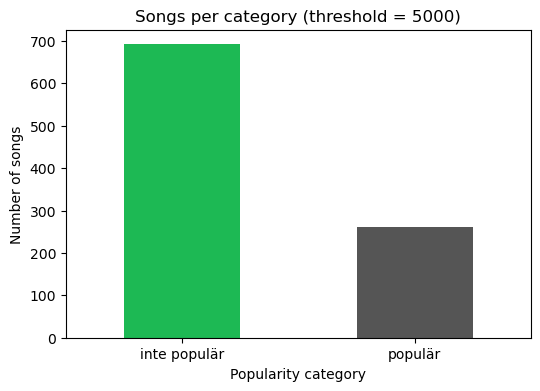


Class distribution (percent):
popularity_category
inte popul√§r    72.612802
popul√§r         27.387198
Name: count, dtype: float64


In [4]:

#4. Visualize Class Distribution (Before Balancing)

#This step shows how many songs fall into ‚Äúpopul√§r‚Äù vs ‚Äúinte popul√§r‚Äù at the chosen threshold (5000). 

# Count how many songs are in each category
class_counts = df["popularity_category"].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind="bar", color=["#1DB954", "#555555"])   # Spotify green & grey
plt.title("Songs per category (threshold = 5000)")
plt.xlabel("Popularity category")
plt.ylabel("Number of songs")
plt.xticks(rotation=0)
plt.show()

# Print percentages for clarity
print("\nClass distribution (percent):")
print(class_counts / len(df) * 100)



#Explanation:

#	value_counts() ‚Üí counts how many songs are popular vs not popular.
#	A bar chart makes imbalance visible (e.g., 70% ‚Äúinte popul√§r‚Äù, 30% ‚Äúpopul√§r‚Äù).
#	We also print the percentages, since the examiner asked for this reasoning.

#Varf√∂r?
#Vi g√∂r detta f√∂r att f√∂rst√• datasetens klassbalans, h√§r uppt√§cker vi att modellen √§r obalanserad vilket kommer p√•verka resultatet.
# Visuellt



In [5]:

#5.Encode Categorical Features & Select Final Features

#Machine learning models only work with numbers, so we must convert text (categorical variables) 
#like mode and key into numeric values. Then we pick which features we‚Äôll use to train the model.

# Encode 'mode' ‚Üí Major = 1, Minor = 0
df["mode_encoded"] = df["mode"].map({"Major": 1, "Minor": 0})

# One-hot encode the musical key (creates dummy columns: key_A, key_B, etc.)
df = pd.get_dummies(df, columns=["key"], prefix="key")

# Define candidate feature set
feature_columns = [
    "bpm",
    "danceability_%",
    "valence_%",
    "energy_%",
    "acousticness_%",
    "instrumentalness_%",
    "liveness_%",
    "speechiness_%",
    "released_year",        
    "mode_encoded"
]

# X = input features, y = target labels
X = df[feature_columns]
y = df["popularity_category"]

print("Selected features:", feature_columns)#




#Explanation:

#	mode_encoded: We turn text into numbers (Major = 1, Minor = 0).
#	key: Converted with one-hot encoding ‚Üí each key becomes its own
#   column (key_A, key_B, ‚Ä¶).
#	Teacher‚Äôs feedback: We now include released_year since it had a relatively high absolute
#    correlation (‚âà -0.39). Negative or positive doesn‚Äôt matter ‚Äî strong correlation helps.
#	X and y:
#	X = input features (used for training).
#	y = target label (popular vs not popular).

#Varf√∂r
#Maskin inl√§rning kan bara jobba med numerisk data,(information som uttrycks i siffror) 
#vi har valt relevanta features som har h√∂g korrelation med popularitet.


Selected features: ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'released_year', 'mode_encoded']


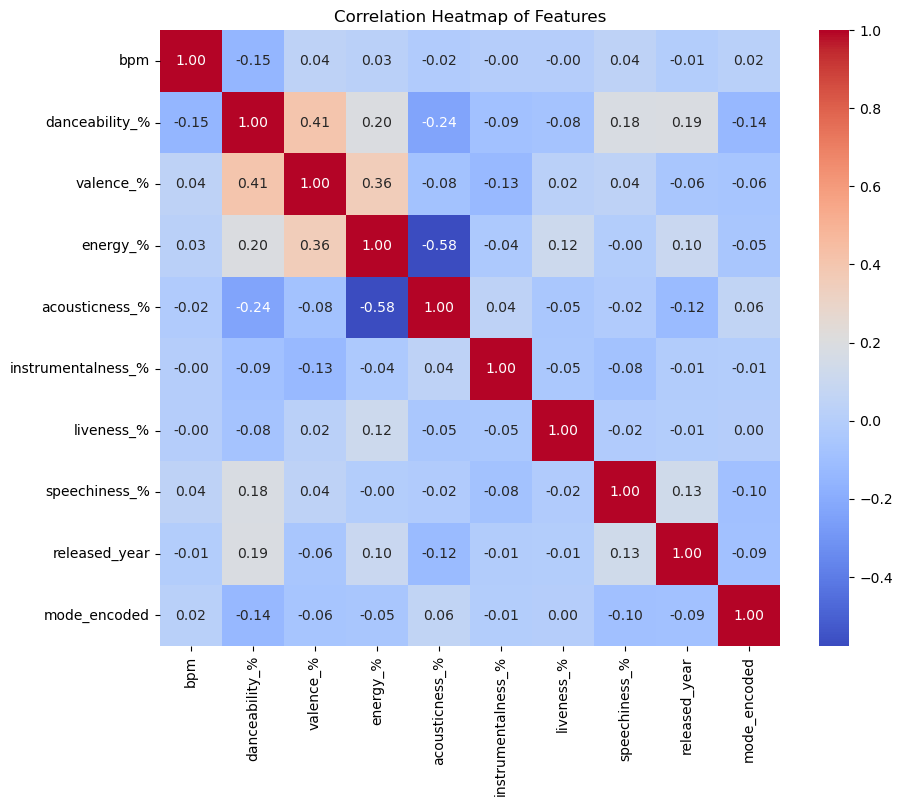

In [6]:
# Correlation heatmap for selected features
plt.figure(figsize=(10,8))
sns.heatmap(df[feature_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()
#Varf√∂r?
#F√∂r att f√∂rst√• features och visa relationer innan vi g√•r vidare till modelltr√§ning

üîπ Baseline accuracy: 0.8010471204188482

üîπ Classification report (Baseline):

              precision    recall  f1-score   support

inte popul√§r       0.79      0.99      0.88       139
     popul√§r       0.89      0.31      0.46        52

    accuracy                           0.80       191
   macro avg       0.84      0.65      0.67       191
weighted avg       0.82      0.80      0.76       191



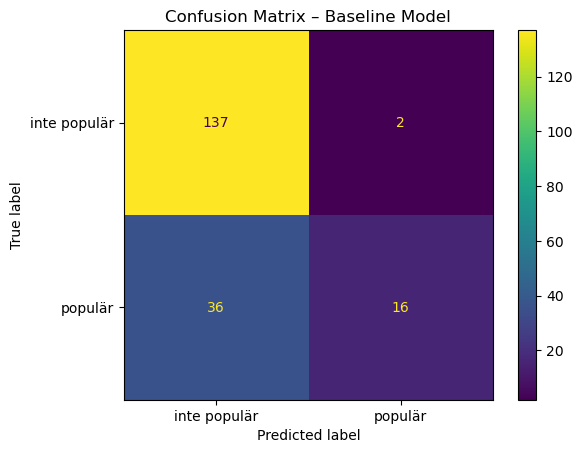

üîπ Baseline Macro-F1: 0.6676739926739926


In [7]:

#6. Baseline Model (Without Balancing

#We first train a simple Logistic Regression on the original (imbalanced) dataset. 
#This gives us a baseline to compare against later.


# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Train baseline Logistic Regression
baseline_model = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
baseline_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_base = baseline_model.predict(X_test)

# Evaluate baseline model
print("üîπ Baseline accuracy:", accuracy_score(y_test, y_pred_base))
print("\nüîπ Classification report (Baseline):\n")
print(classification_report(y_test, y_pred_base, zero_division=0))

# Confusion Matrix for visual clarity
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_base, labels=["inte popul√§r", "popul√§r"])
plt.title("Confusion Matrix ‚Äì Baseline Model")
plt.show()

# Extra: Macro-F1 score
print("üîπ Baseline Macro-F1:", f1_score(y_test, y_pred_base, average="macro"))

#Explination
#	train_test_split: Splits data into train (80%) and test (20%). We use stratify=y to preserve the same class balance in both sets.
#	LogisticRegression: A simple linear classifier. max_iter=1000 avoids convergence warnings.
#	Evaluation:
#	Accuracy: How many predictions are correct.
#	Classification Report: Shows precision, recall, and F1-score per class.
#	Confusion Matrix: Visualizes correct vs incorrect predictions.
#	Macro-F1: Teacher recommended ‚Üí averages performance equally across classes.
#	This is the starting point. Because the dataset is imbalanced, we expect the model to perform better at predicting 
# ‚Äúinte popul√§r‚Äù and worse at ‚Äúpopul√§r‚Äù.

#Varf√∂r?
#F√∂r att se vad f√∂r obolans v√•ran nuvarande modell har s√•h√§r
#ser v√•ran modell ut utan n√•gon balansering. Den har en extremt h√∂g obalans.
#Modellen missar popul√§ra l√•tar 0,31 l√•tar hittar den bara, modellen l√§r sig och favoriserar den datan som √§r st√∂rre.



üîπ Class counts after balancing:
popularity_category
inte popul√§r    692
popul√§r         692
Name: count, dtype: int64

üîπ Class share after balancing:
popularity_category
inte popul√§r    0.5
popul√§r         0.5
Name: proportion, dtype: float64


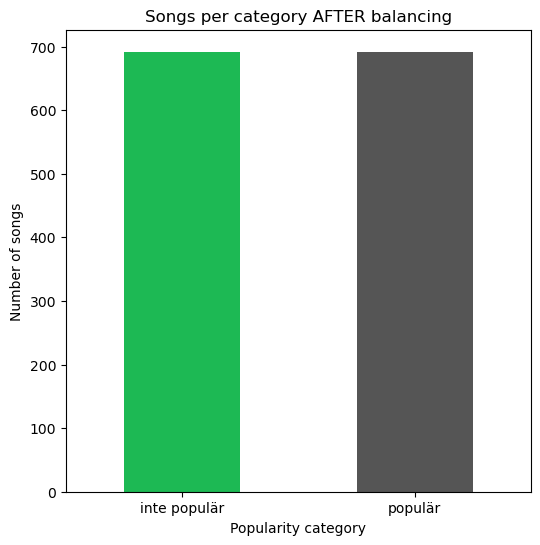

In [8]:

#7. Balance the Dataset (Oversampling)

#We saw earlier that the dataset is imbalanced (many more ‚Äúinte popul√§r‚Äù songs than ‚Äúpopul√§r‚Äù). 
#To make the model learn more fairly, we apply oversampling ‚Üí duplicate minority-class samples until both classes are equal.


# Initialize oversampler
oversampler = RandomOverSampler(random_state=RANDOM_STATE)

# Apply oversampling to features (X) and labels (y)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Check new class distribution
print("üîπ Class counts after balancing:")
print(y_resampled.value_counts())
print("\nüîπ Class share after balancing:")
print(y_resampled.value_counts(normalize=True).round(3))

# Visualize balanced distribution
plt.figure(figsize=(6,6))
y_resampled.value_counts().plot(kind="bar", color=["#1DB954", "#555555"])
plt.title("Songs per category AFTER balancing")
plt.xlabel("Popularity category")
plt.ylabel("Number of songs")
plt.xticks(rotation=0)
plt.show()

#Explanation:

#	RandomOverSampler: Copies rows from the minority class (‚Äúpopul√§r‚Äù)
#     until both classes are equally represented. fit_resample(X, y): Produces new balanced X_resampled, y_resampled.
#	Value counts: Now each class should have the same number of samples (‚âà50/50).
#	Plot: The bar chart clearly shows the new balanced dataset.

#Varf√∂r?
#Detta g√∂rs eftersom modellen hade en s√•dan stor obalans, 
#s√• nu ger vi modellen lika mycket att j√§mnf√∂ra med f√•r lika m√•nga exempel fr√•n varje klass.
#Om modellen har mer data fr√•n n√•got av specifika klasserna kommer resultatet luta √•t det h√•llet.
#√Ñven om sj√§lva "accuray" √§r l√§gre s√• ger det en mer r√§ttvis modell
#Vi s√§nker "inte popul√§r" klassen till samma antal som finns i "popul√§r" klassen f√∂r att f√• en b√§ttre j√§mnf√∂relse.


C:\Users\brant\AppData\Local\Temp\ipykernel_69980\2676322103.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")


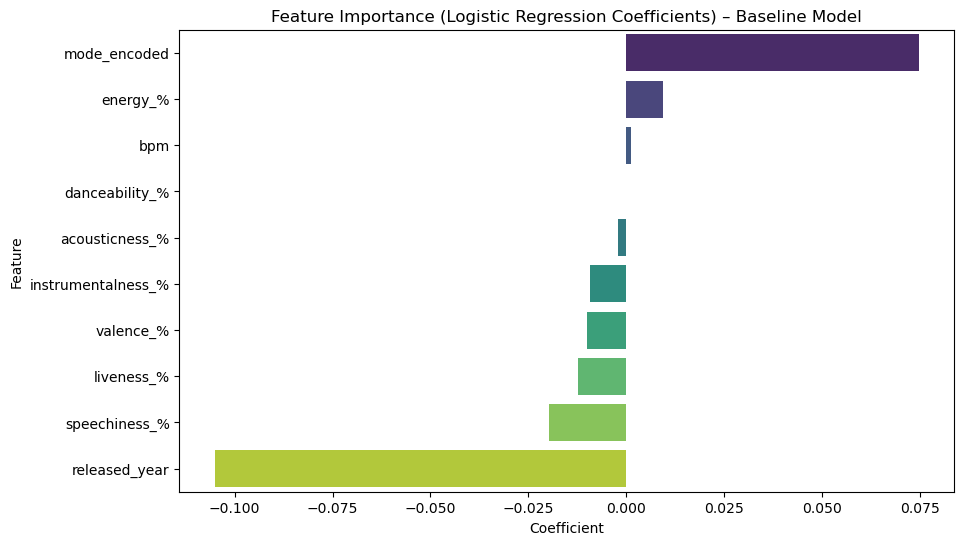

In [9]:
# Get coefficients and match with feature names
coef_df = pd.DataFrame({
    "Feature": feature_columns,
    "Coefficient": baseline_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")
plt.title("Feature Importance (Logistic Regression Coefficients) ‚Äì Baseline Model")
plt.show()
#Varf√∂r visas detta?
#F√∂r att visa vad som p√•verkar resultatet mest. Ju h√∂gre den √§r p√• den l√•ten ju mer g√∂r att den blir mer popul√§r

üîπ Oversampled accuracy: 0.7725631768953068

üîπ Classification report (Oversampled):

              precision    recall  f1-score   support

inte popul√§r       0.72      0.88      0.80       139
     popul√§r       0.85      0.66      0.74       138

    accuracy                           0.77       277
   macro avg       0.79      0.77      0.77       277
weighted avg       0.79      0.77      0.77       277



C:\Users\brant\miniconda3\envs\mittprojekt\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


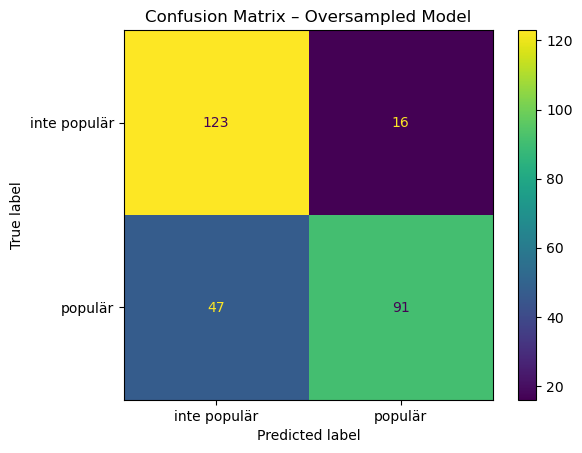

üîπ Oversampled Macro-F1: 0.769486823855756


In [10]:
# Split balanced data into train/test
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=RANDOM_STATE, stratify=y_resampled
)

# Train Logistic Regression on balanced data
model_os = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
model_os.fit(X_train_os, y_train_os)

# Predict on test split
y_pred_os = model_os.predict(X_test_os)

# Evaluate balanced model
print("üîπ Oversampled accuracy:", accuracy_score(y_test_os, y_pred_os))
print("\nüîπ Classification report (Oversampled):\n")
print(classification_report(y_test_os, y_pred_os, zero_division=0))

# Confusion Matrix for oversampled model
ConfusionMatrixDisplay.from_predictions(y_test_os, y_pred_os, labels=["inte popul√§r", "popul√§r"])
plt.title("Confusion Matrix ‚Äì Oversampled Model")
plt.show()

# Macro-F1 (teacher asked for this)
print("üîπ Oversampled Macro-F1:", f1_score(y_test_os, y_pred_os, average="macro"))

#Varf√∂r?

#Den h√§r koden anv√§nds f√∂r att tr√§na, utv√§rdera och f√∂rst√• hur en maskininl√§rningsmodell presterar p√• ett balanserat dataset. 
#Eftersom datasetet ursprungligen var obalanserat (fler exempel av "inte popul√§r" √§n "popul√§r"), 
#kan en modell annars bli partisk och bara l√§ra sig k√§nna igen majoritetsklassen.

#Genom att oversampla minoritetsklassen skapar vi ett dataset d√§r b√•da klasserna har lika m√•nga exempel. 
#D√§refter delas detta dataset i tr√§ning och test med train_test_split (med stratify=y_resampled f√∂r att s√§kerst√§lla att b√•da klasserna,
#f√∂rdelas lika i b√•da delarna). Detta g√∂r att modellen tr√§nas och testas p√• data som √§r representativ f√∂r b√•da klasserna.

#N√§r modellen tr√§nas p√• den balanserade tr√§ningen och testas p√• en separat del av datan kan vi f√• en realistisk bild av hur v√§l modellen
#presterar i praktiken. Utv√§rderingen med accuracy, classification report, 
#confusion matrix och Macro-F1-score ger oss flera perspektiv:

#Accuracy visar andelen korrekt klassificerade exempel.

#Classification report visar precision och recall f√∂r varje klass.

#Confusion matrix visar hur m√•nga exempel som √§r felklassificerade och vilken typ av fel som uppst√•r.

#Macro-F1 ger ett balanserat m√•tt p√• prestanda som inte l√•ter majoritetsklassen dominera resultatet.

#Sammanfattningsvis: Denna kod √§r viktig f√∂r att s√§kerst√§lla att modellen inte bara l√§r sig majoritetsklassen, 
#utan √§ven presterar r√§ttvist och robust f√∂r b√•da klasserna. Det ger en mer r√§ttvis, transparent och p√•litlig modell.

## Slutsats

Vi valde att formulera popularitetsproblemet som en bin√§r klassificering (popul√§r vs inte popul√§r) baserat p√• antalet Spotify-spellistor (tr√∂skel 5000).
En obalanserad baseline visade h√∂g accuracy (~0.80) men d√•lig f√∂rm√•ga att uppt√§cka popul√§ra l√•tar (recall ‚âà 0.31). 
Efter balansering med RandomOverSampler f√∂rb√§ttrades macro-F1 fr√•n ‚âà0.67 till ‚âà0.77 och recall f√∂r den popul√§ra klassen √∂kade till ‚âà0.66,
vilket visar att modellen nu √§r mycket b√§ttre p√• att hitta verkliga popul√§ra l√•tar. 

Detta resultat visar att hantering av klassobalans √§r avg√∂rande n√§r minoritetsklassen √§r aff√§rskritisk. Modellen √§r dock begr√§nsad av datasetets storlek,
m√•lvariabelns definition och att m√•nga aspekter av vad som g√∂r en l√•t popul√§r 
(t.ex. marknadsf√∂ring, virala effekter) inte finns med i v√•ra features. 
F√∂r att f√∂rb√§ttra modellen rekommenderas f√∂ljande: prova SMOTE eller andra syntetiska metoder, testa tr√§d-baserade modeller 
(Random Forest, XGBoost), g√∂ra hyperparameter-s√∂kning och anv√§nda stratifierad cross-validation samt tidsbaserad validering. 
Dessa steg f√∂rv√§ntas ge robustare och mer generaliserbara resultat.
